# Project 1: House Price Prediction
The goal for this project is to build a solution that is capable of predicting the house prices better than individuals.

The following properties can be considered helpful for predicting price of house:
1. Total square feet area
2. Number of bedrooms, bathrooms stories, etc
3. Furnishing status
4. Basic amenities like:
   - Air conditioning
   - Hot water heating
   - Parking
   - Basement

### Import Libraries

In [1]:
### Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor

### Importing dataset available in sklearn
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
print('Libraries Imported...')

Libraries Imported...


### Import & Read the CSV dataset

In [2]:
df = pd.read_csv('Housing.csv')

### Data Preprocessing
#### Checking the top 5 rows

In [3]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Checking for null values

In [4]:
df.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

#### Double checking null values and datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


`Yes, The dataset contains objects to be converted to int64 type which shall be done via encoding.`
#### Encode Objects to Int
##### - Make A Label Encoding Function to Simplify the Task

In [6]:
def label_encode(df, colName):
    if (type(colName) == str):
        # converting type of columns to 'category'
        df[colName] = df[colName].astype('category')
        # Assigning numerical values and storing in another column
        df[colName] = df[colName].cat.codes
    elif (type(colName) == list):
        for col in colName:
            # converting type of columns to 'category'
            df[col] = df[col].astype('category')
            # Assigning numerical values and storing in another column
            df[col] = df[col].cat.codes

##### - Objects to Encode
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea
- furnishingstatus

In [7]:
objList = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
label_encode(df, objList)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


`Now that Label Encoding has been done, Let's start making Test-Train Split of the Dataset.`

---
### Train Test Split
#### Removing nan and infinite values

In [8]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

#### Creating train test split

In [9]:
X = df.drop(columns=['price'])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.18)

<IPython.core.display.Javascript object>

#### Checking if the training set was correcly splitted

In [10]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (446, 12) Target:  (446,)
Test set - Features:  (99, 12) Target:  (99,)


#### Running LazyRegressor 

In [11]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 41/41 [00:04<00:00, 10.04it/s]


#### Models & Predictions (Result)

In [12]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.59,0.64,1012316.72,0.14
RidgeCV,0.58,0.63,1031447.68,0.02
LassoCV,0.58,0.63,1032926.58,0.06
Ridge,0.58,0.63,1032960.48,0.01
LassoLars,0.58,0.63,1033141.88,0.01
Lasso,0.58,0.63,1033146.38,0.02
TransformedTargetRegressor,0.58,0.63,1033146.61,0.01
LinearRegression,0.58,0.63,1033146.61,0.01
Lars,0.58,0.63,1033146.61,0.07


In [13]:
predictions

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GammaRegressor,...,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,3961781.25,4306050.00,4742413.21,2100000.00,4742413.21,4379812.28,4741381.75,4830000.00,4421168.50,4235468.17,...,3977792.87,3452785.00,4288617.52,4293200.63,4279334.74,4273508.26,4288105.35,4437832.99,3728161.25,3768782.32
1,4192537.74,4398800.00,4742413.21,4410000.00,4742413.21,3915501.80,4740242.82,4900000.00,4676210.00,4008697.74,...,4060210.92,4503940.00,3716502.55,3726021.68,3706635.91,4273509.05,3715440.03,4051160.71,4284326.00,4213519.62
2,5412361.11,6271300.00,4742413.21,6510000.00,4742413.21,5091282.54,4743213.80,6510000.00,6443710.00,4816501.29,...,4761759.38,6328140.00,5311856.61,5294099.81,5301040.00,4273521.60,5313931.25,5012512.11,6187373.00,6005395.22
3,6590290.00,6116600.00,4742413.21,7035000.00,4742413.21,6040997.55,4746499.29,6195000.00,7636020.00,5670118.73,...,5770436.14,6789154.40,6283918.89,6271967.79,6270421.81,4273535.19,6285262.97,5865328.01,5773740.00,6493320.44
4,5647529.26,3541300.00,4742413.21,3493000.00,4742413.21,4081117.01,4739254.68,3703000.00,3200050.00,3916920.71,...,2962155.67,4106900.00,4222121.23,4208710.08,4223640.76,4273515.96,4223685.06,4087379.67,3787318.50,3992980.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,4495546.96,4099900.00,4742413.21,4767000.00,4742413.21,5354967.89,4744038.87,4970000.00,4651500.00,4938781.69,...,4660377.55,4205705.00,5558292.35,5545507.85,5573268.51,4273520.66,5559756.58,5247943.64,3889496.25,4050786.84
95,3600160.95,3404800.00,4742413.21,2520000.00,4742413.21,3405777.72,4738355.52,4095000.00,2817150.00,3601757.67,...,3299245.30,3240930.00,3163833.86,3174204.13,3164111.02,4273472.59,3162687.46,3592403.12,2896940.25,3194292.28
96,4355736.43,3678500.00,4742413.21,2940000.00,4742413.21,3792254.29,4739798.19,2940000.00,3359790.00,3823584.82,...,3537738.70,3704015.00,3498449.68,3516104.23,3506597.31,4273492.38,3496436.45,3953702.66,3063945.00,3401633.09
97,5655735.85,6504050.00,4742413.21,5425000.00,4742413.21,6103120.60,4746458.51,5565000.00,5867645.00,5733594.51,...,5937734.44,5823055.00,6394130.77,6379690.27,6378966.52,4273538.52,6395751.58,5903218.48,6081370.00,6434207.69


### Checking Score
#### Few Helpful Functions

In [14]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))
    
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4', line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

#### Importing Experimental Libraries

In [15]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

#### Histogram-based Gradient Boosting Regression Tree

R-squared: 0.5858412807020178
Mean Squared Error: 1090995.2152701472


<IPython.core.display.Javascript object>

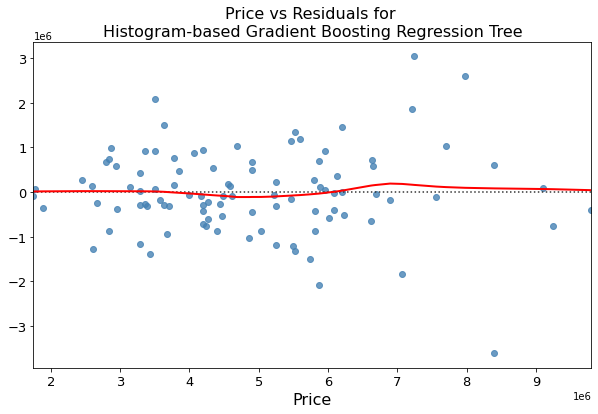

In [16]:
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)


rmse(hist, y_test, y_pred, X_train, y_train)

scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

### Conclusion
The results are not very good, so either more data is required or the data is to be optimized in a much better way (data formatting and such) or a different approach/model/technique is to be used or all of the above to improve the predective ability of our model.

---
# <center>Q.E.D.</center>